# Labels in form of csv instead of structured in seperate folders

Images for both cats and dogs are mixed in 1 folder while their labels are provided in form of csv file.

You read from folder and u read from dataframe. This dataframe has a mapping of which image has which label.

*<font color=blue>Note*
    
*So either segregated folders of each class should be provided OR if all images dumped in 1 folder then corresponding labels/csv file should be provided for mapping*

In [1]:
import tensorflow as tf
import pandas as pd


In [2]:
##Import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten,Dense


from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.9.1'

In [4]:
df_train=pd.read_csv("data/cat_dog_files/train-files-labels.csv")

In [5]:
df_train.head()

,label,id
0,dog,dog.1.jpg
1,dog,dog.10.jpg
2,dog,dog.11.jpg
3,dog,dog.12.jpg
4,dog,dog.13.jpg


In [6]:
df_test=pd.read_csv("data/cat_dog_files/test-files-labels.csv")

In [7]:
datagen=ImageDataGenerator(rescale=1./255)

Now when u r picking labels from csv/dataframe u have the function flow_from_dataframe unlike flow_from_directory which u used when u had images in folders with each folder belonging to 1 class.

In [8]:
pwd

'/Users/sylvia/Desktop/IITR/M10-CV/Live_lectures'

In [9]:

train_set=datagen.flow_from_dataframe(dataframe=df_train, 
                                      directory="data/cat_dog_files/train", 
                                      x_col="id",    # has image name
                                      y_col="label", # has either cat or dog label
                                      class_mode="binary", 
                                      target_size=(64,64))


Found 98 validated image filenames belonging to 2 classes.


In [10]:

test_set=datagen.flow_from_dataframe(dataframe=df_test, 
                                     directory="data/cat_dog_files/test", 
                                     x_col="id", 
                                     y_col="label", 
                                     class_mode="binary", 
                                     target_size=(64,64))


Found 38 validated image filenames belonging to 2 classes.


In [11]:

classifier = Sequential()
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Conv2D(64,(3,3),input_shape = (64,64,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))



classifier.add(Flatten())
classifier.add(Dense(128,activation = 'relu'))
 

classifier.add(Dense(1, activation='sigmoid'))



2023-09-29 09:40:39.518484: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

In [13]:
classifier.compile(optimizer='adam',
                   loss='binary_crossentropy', 
                   metrics=["accuracy"])

In [14]:
classifier.fit(train_set,epochs=5,validation_data=test_set)

Epoch 1/5
4/4 [==============================] - 1s 152ms/step - loss: 0.7159 - accuracy: 0.4388 - val_loss: 0.7014 - val_accuracy: 0.5000
Epoch 2/5
4/4 [==============================] - 0s 99ms/step - loss: 0.6934 - accuracy: 0.5102 - val_loss: 0.6924 - val_accuracy: 0.5263
Epoch 3/5
4/4 [==============================] - 0s 100ms/step - loss: 0.6890 - accuracy: 0.6531 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
4/4 [==============================] - 0s 101ms/step - loss: 0.6890 - accuracy: 0.5306 - val_loss: 0.6975 - val_accuracy: 0.5000
Epoch 5/5
4/4 [==============================] - 0s 99ms/step - loss: 0.6816 - accuracy: 0.5306 - val_loss: 0.7070 - val_accuracy: 0.5000


In [15]:
## Prediction of single new data
import numpy as np
from tensorflow.keras.preprocessing import image
test_image= image.load_img('data/dog1.jpg' ,target_size =(64,64))

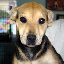

In [16]:
test_image

In [17]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [18]:
## For single prediction change the dimension using axis. To remove problem of batch

test_image = test_image.reshape(1,64,64,3)

In [19]:
result = classifier.predict(test_image)

1/1 [==============================] - 0s 58ms/step


In [20]:
result

array([[2.3319972e-12]], dtype=float32)

In [21]:
## Class label of dog and cat

if result >= 0.5:
        print('dog')
else:
        print('cat')

cat
